# Regressão Logistica
Avaliando a relação entre diabetes e IMC com regressão logística

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

## Baixando dataset

Descomente este código caso estejas no google colab

In [58]:
# !pip install wget
# !wget https://raw.githubusercontent.com/plorazxi/Inteligencia-computacional/refs/heads/main/Logistic-Regression/data_banknote_authentication.csv

## Importando dataset

In [59]:
df = pd.read_csv('/content/data_banknote_authentication.csv')

df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Tratando Dataset

Verificando qual melhor coluna comparado com o outcome

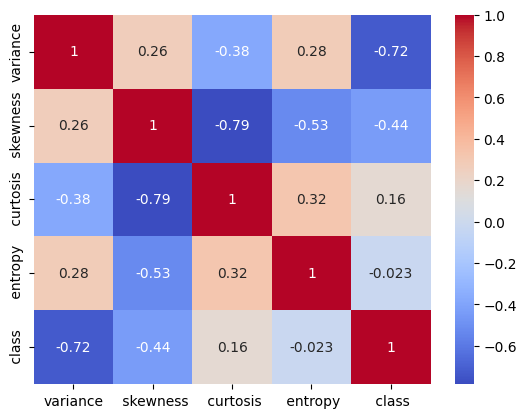

In [60]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Plotando os dados

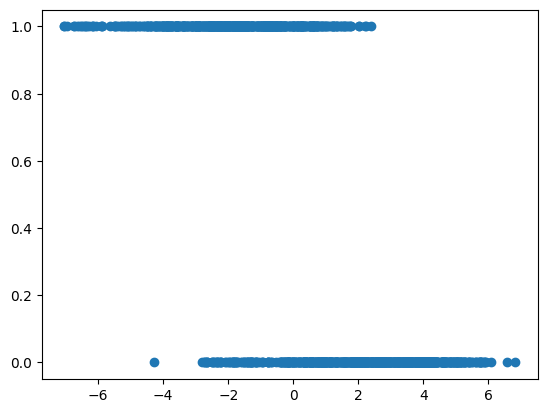

In [61]:
x = df['variance']
y = df[' class']
plt.scatter(x, y)
plt.show()

In [62]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Criando classe da regressão logística

In [ ]:
class LogisticRegression():
    # Inicialização
    def __init__(self, epochs, learnRate):
        self.a = np.random.randn() # Peso do unico input
        self.b = np.random.randn() # BIAS
        self.epochs = epochs
        self.learningRate = learnRate

    # Função de ativação
    def sigmoid(self, x):
      z = self.a * x + self.b
      return 1 / (1 + np.exp(-z))

    # Treinamento
    def fit(self, x, y):
        err_historic = []
        for _ in range(self.epochs):
            # Predizendo
            y_hat = self.sigmoid(x)
            # Calculando erro e adicionando à lista de historico 
            err = log_loss(y, y_hat)
            err_historic.append(err)
            # Atualizando os pesos (a taxa de aprendizado vezes a media dos gradientes descendentes)
            self.a -= self.learningRate * np.mean((y_hat - y) * x)
            self.b -= self.learningRate * np.mean((y_hat - y))
        # retornando o historico de erro, para a vizualização
        return err_historic

    # Função de predição
    def predict(self, input):
      return 1 if self.sigmoid(input) > 0.5 else 0

## Instanciando regressão

In [64]:
modelo = LogisticRegression(1000, 0.001)

err_historic = modelo.fit(x_train, y_train)

## Plotando o grafico de erro e da regressão logística

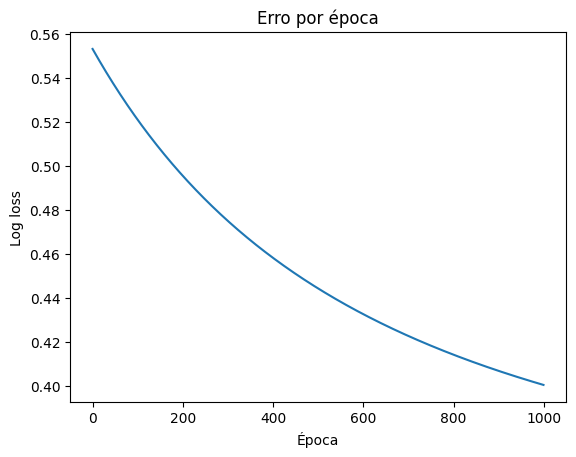

In [65]:
plt.plot(err_historic)
plt.xlabel("Época")
plt.ylabel("Log loss")
plt.title("Erro por época")
plt.show()

## Plotando a regressão em cima dos dados de treino

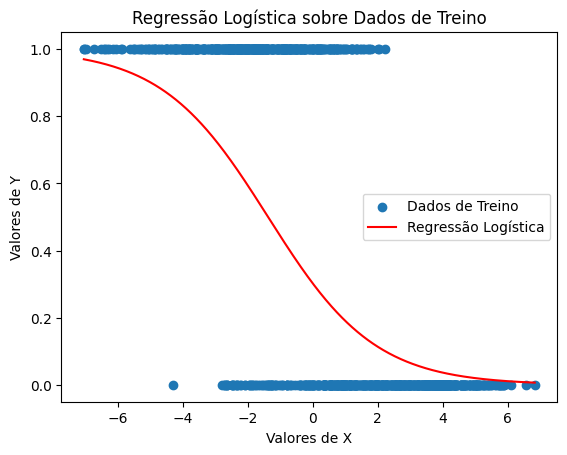

In [66]:
plt.scatter(x_train, y_train, label="Dados de Treino")

x_vals = np.linspace(x_train.min(), x_train.max(), 614)
y_vals = modelo.sigmoid(x_vals)

plt.plot(x_vals, y_vals, color='red', label='Regressão Logística')

plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.title("Regressão Logística sobre Dados de Treino")
plt.legend()
plt.show()

## Calculando o erro

In [ ]:
y_hat_test = modelo.sigmoid(x_test)

err = log_loss(y_test, y_hat_test)

print(err)

0.4619026001658542
